<a href="https://colab.research.google.com/github/suprajamedicherla/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**

Recently in our lifetimes, we have gone through a global pandemic as a collective, which has impacted every aspect of our daily lives, our attitudes, the economy, and our sense of interconnectedness and resilience in the face of unprecedented challenges. We live in an era where we are able to communicate with each other across the globe about the nature of the virus and develop and dispatch vaccines at a rapid pace, which has helped to contain the spread of the disease.

So, for my final project, I chose COVID-19 data related to texas state. I chose this particular state because it is the state where most covid-19 cases were recorded. Analyzing COVID-19 data in Texas can provide insights into how the healthcare infrastructure in a large and diverse state responds to the pandemic. I explored multiple datasets obtained from diverse sources like cdc.gov and Snowflake, and I was able to find a few files related to COVID-19 on GitHub and Figshare, encompassing comprehensive information on COVID-19 statistics across various U.S. states and territories. These datasets are available in CSV and xlsx formats. These files are Conditions COVID-19 data for the second wave.csv, csse_covid_19_daily_reports_us.csv, Provisional COVID-19 Death Counts in the United States by County.


My objective with these datasets, along with additional data for my project is to assess,

*   The 'Impact of COVID-19 across various demographics and factors such as comorbidities and the death rate' for a particular state(TEXAS).
*   Risk factors of COVID-19.
*   Deaths of COVID-19 in total population.
*   Covid deaths in urban and rural areas.
*   The states which are mostly affected due to COVID-19
*   Regression Analysis of comorbidities with deaths involving covid-19 and all causes


Examining these factors can help in Understanding how different demographic
groups are affected, identifying the prevalence of comorbidities, Identifying groups at higher risk of severe outcomes helps in prioritizing vaccine distribution. Numerous studies have indicated that older adults, particularly those above the age of 65, are more likely to experience severe illness, hospitalization, and mortality if infected with the virus. Age-related factors, including a weakened immune system and the presence of age-related comorbidities, contribute to this increased vulnerability. Individuals with pre-existing health conditions, such as cardiovascular diseases, diabetes, respiratory issues, and compromised immune systems, are more susceptible to severe complications from COVID-19. The virus can exacerbate these underlying conditions, leading to a higher likelihood of hospitalization and death. Thus, recognizing these patterns can be crucial in public health measures, vaccine distribution strategies, and healthcare resources to protect those most at risk.

## **Data Extraction**

◾ Demographics of COVID-19 patients data for Texas were retrieved from Snowflake(csv format)
dataset link- https://app.snowflake.com/utazsqv/qx47483/#/data/databases/COVID19_EPIDEMIOLOGICAL_DATA/schemas/PUBLIC/table/DEMOGRAPHICS/data-preview

◾ Risk factors for COVID-19 along with Co-morbidities and social factors were retrieved from Figshare(csv format)
dataset link- https://figshare.com/articles/dataset/COVID-19_data_for_the_second_wave/13283801

◾ Provisional COVID-19 Death Counts in the United States by County data for Texas were retrieved from data.cdc.gov(xlsx format)
dataset link- https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-in-the-United-St/kn79-hsxy/data


**Importing Necessary Libraries**

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset-1: Demographics Data**

The first dataset provides comprehensive information on the demographics of the US population affected by COVID-19. Each row corresponds to a specific county and includes details such as state , county name, total population, male population and female population.  The dataset is valuable for understanding the distribution of population across different states in USA. By examining the total population, gender distribution, and other demographic factors, researchers and public health officials can identify patterns, trends, and disparities in how the virus affects various communities.

In [142]:
#Reading the Dataframe
covid_demographics = pd.read_csv("/content/2023-12-04 4_50pm.csv")
#Data before cleaning
covid_demographics

,ISO3166_1,ISO3166_2,FIPS,LATITUDE,LONGITUDE,STATE,COUNTY,TOTAL_POPULATION,TOTAL_MALE_POPULATION,TOTAL_FEMALE_POPULATION
0,US,NY,36049,43.782635,-75.218940,NY,Lewis County,27107,13671,13436
1,US,NY,36051,42.624741,-77.534340,NY,Livingston County,64622,32439,32183
2,US,NY,36053,42.776950,-75.343208,NY,Madison County,72089,35429,36660
3,US,NY,36055,43.075603,-77.385930,NY,Monroe County,749236,361925,387311
4,US,NY,36057,42.934388,-74.124411,NY,Montgomery County,49667,24468,25199
...,...,...,...,...,...,...,...,...,...,...
3135,US,WY,56037,41.572161,-108.462301,WY,Sweetwater County,44812,23381,21431
3136,US,WY,56039,44.048663,-110.426070,WY,Teton County,22623,11742,10881
3137,US,WY,56041,41.348064,-110.270241,WY,Uinta County,20893,10587,10306
3138,US,WY,56043,43.868556,-107.512014,WY,Washakie County,8351,4062,4289


In [143]:
#Renaming column names
covid_demographics.rename(columns={'ISO3166_1': 'COUNTRY_CODE', 'ISO3166_2': 'STATE_CODE','TOTAL_MALE_POPULATION': 'MALE_POPULATION', 'TOTAL_FEMALE_POPULATION': 'FEMALE_POPULATION'}, inplace=True)

In [144]:
#Dropping Unnecessary columns
covid_demographics.drop(columns=["STATE_CODE","LATITUDE", "LONGITUDE"], inplace=True)

#### **Graph-1: States that are affected by Covid-19**

This is essential for understanding how different regions across the United States are grappling with the challenges posed by the Covid-19 pandemic. High-impact areas may be given priority to achieve a more rapid reduction in transmission and protect vulnerable populations. Researchers can focus their studies on states that are most affected to gain insights into the factors contributing to higher transmission rates, severe outcomes, and effective mitigation strategies.

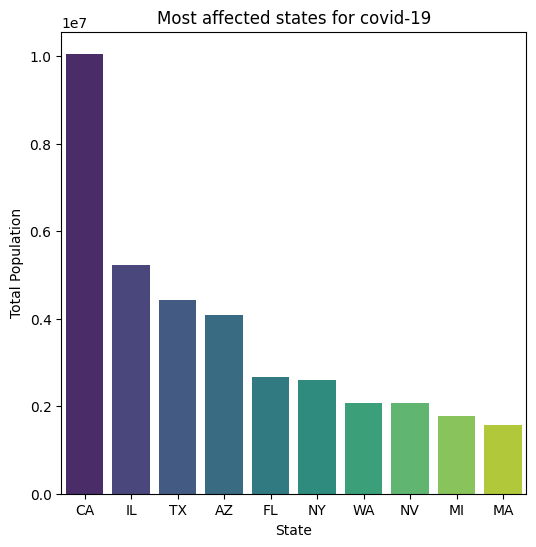

In [145]:
#Top 10 states who are mostly affected by covid-19
max_covid_population = covid_demographics.groupby('STATE')['TOTAL_POPULATION'].max().nlargest(10)

#Creating a bar plot with states on the x-axis and total covid population on the y-axis
plt.figure(figsize=(6, 6))
sns.barplot(x=max_covid_population.index, y=max_covid_population.values, palette='viridis')
plt.title('Most affected states for covid-19')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.show()

The visualization plots the top 10 US states with the highest total population affected by COVID-19 infections. As we can observe, California, Texas, and Illinois make the top 3 with the most confirmed COVID-19 cases when aggregated at a state-wide level.

### **Filtering Texas state**

Given the significant impact of the COVID-19 pandemic on Texas, my focus was on evaluating the specific effects of the virus within this state. To achieve this, I conducted a targeted analysis by filtering the COVID-19 demographic data based on the "state" column, isolating information specific to Texas.

In [146]:
#Filtering texas state using state column from the covid demographics
filter_coviddemographics = covid_demographics["STATE"] == "TX"
texas_demographics = covid_demographics[filter_coviddemographics ]
texas_demographics.reset_index()

,index,COUNTRY_CODE,FIPS,STATE,COUNTY,TOTAL_POPULATION,MALE_POPULATION,FEMALE_POPULATION
0,2521,US,48001,TX,Anderson County,57772,35381,22391
1,2522,US,48003,TX,Andrews County,17215,8734,8481
2,2523,US,48005,TX,Angelina County,87657,42765,44892
3,2524,US,48007,TX,Aransas County,24729,12246,12483
4,2525,US,48009,TX,Archer County,8750,4344,4406
...,...,...,...,...,...,...,...,...
249,2770,US,48499,TX,Wood County,43198,21423,21775
250,2771,US,48501,TX,Yoakum County,8316,4228,4088
251,2772,US,48503,TX,Young County,18275,8997,9278
252,2773,US,48505,TX,Zapata County,14335,7185,7150


## **Dataset-2: Risk factors for COVID-19 along with Commorbidities and social factors**

The second dataset provides information on risk factors for COVID-19. Analyzing risk factors for COVID-19, including comorbidities and social factors, is crucial for targeted public health strategies. By identifying populations at higher risk of severe outcomes, such as older individuals or those with underlying health conditions, authorities can allocate resources more efficiently, prioritize vaccination efforts, and design tailored public awareness campaigns. This approach not only enhances the effectiveness of pandemic response measures but also contributes to more equitable and informed decision-making in healthcare planning, ultimately leading to a more comprehensive and impactful management of the COVID-19 pandemic.

Comorbidities and disorders include CVD, cardiomyopathy, myocarditis, hypertensive heart disease, peripheral vascular disease, atrial fibrillation, cerebrovascular disease, diabetes, hepatitis, etc. Demographics and social factors include age, female African American%, female white American%, male African American%, male white American%, etc.

In [147]:
#Reading the Dataframe
covid_comorbidities = pd.read_csv("/content/Data.Wave2.csv")
#Data before cleaning
covid_comorbidities

,countyFIPS,County Name,State,stateFIPS,mean_age,Cluster,w1,w2,w3,w4,...,fair_poor_health,Eta0,Eta1,C_Eta0,C_Eta1,P1,P2,P3,P4,P5
0,1001,Autauga County,AL,1,39.652088,2,0.019,0.023,0.021,0.023,...,18,0.025,0.063,0.025,0.064,0.002,0.991,0.0,0.007,0.0
1,1003,Baldwin County,AL,1,42.485800,2,0.026,0.019,0.01,0.007,...,18,0.021,0.144,0.021,0.144,0.001,0.996,0.0,0.002,0.0
2,1005,Barbour County,AL,1,41.469558,2,0.005,0.003,0.005,0.007,...,26,0.002,-0.078,0.002,-0.082,0.005,0.968,0.0,0.027,0.0
3,1007,Bibb County,AL,1,40.574149,2,0.011,0.007,0.005,0.007,...,20,0.005,-0.057,0.005,-0.061,0.006,0.956,0.0,0.038,0.0
4,1009,Blount County,AL,1,40.806125,2,0.011,0.006,0.004,0.002,...,21,0.006,0.013,0.006,0.014,0.006,0.958,0.0,0.035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,49049,Utah County,UT,49,30.133693,2,0.008,0.006,0.005,0.005,...,12,0.007,0.021,0.007,0.022,0.006,0.962,0.0,0.032,0.0
1314,49051,Wasatch County,UT,49,35.528072,2,0.006,0.008,0.009,0.008,...,11,0.008,0.004,0.008,0.004,0.005,0.968,0.0,0.027,0.0
1315,49053,Washington County,UT,49,40.276180,2,0.002,0.003,0.004,0.005,...,11,0.002,-0.052,0.002,-0.055,0.006,0.957,0.0,0.038,0.0
1316,49057,Weber County,UT,49,35.314896,2,0.02,0.014,0.01,0.011,...,14,0.016,0.067,0.016,0.068,0.003,0.983,0.0,0.013,0.0


In [148]:
#Dropping Unnecessary columns
covid_comorbidities.drop(columns=[ "Cluster", "w1",	"w2",	"w3", "w4",	"w5","w6",	"w7", "AVG_AQI", "AVG_PM", "tavg", "Eta0",	"Eta1",	"C_Eta0",	"C_Eta1",	"P1",	"P2",	"P3",	"P4",	"P5"], inplace=True)


In [149]:
#Renaming column names
covid_comorbidities.rename(columns={'State': 'State_code','ProMBlack': 'Male_Black', 'ProFBlack': 'Female_Black', 'ProMWhite': 'Male_White', 'ProFWhite': 'Female_White', 'total_male_x': 'Total_male', 'total_female_x': 'Total_female', 'total_male_y': 'Avg_of_male', 'total_female_y': 'Avg_of_female' }, inplace=True)

In [150]:
#Converting lowercase column names to uppercase using functions and loops
def columns_to_uppercase(final_covidcomorbidities):
    """(object) -> object
    This function will take in a dataframe and the column(s) selected to capitalize every value in the column.
    """
    for column in final_covidcomorbidities.columns:
        final_covidcomorbidities.rename(columns={column: column.upper()}, inplace=True)
    return final_covidcomorbidities

In [151]:
data_of_covidcomorbidities = columns_to_uppercase(covid_comorbidities)

In [152]:
#Filtering texas state using state column
filter_condition = covid_comorbidities["STATE_CODE"] == "TX"
texas_comorbidities =covid_comorbidities[filter_condition]

## **Dataset-3: Covid-19 deaths in Texas**

Third dataset gives information on COVID-19-related deaths, specifically categorized by county, providing a comprehensive and evolving perspective on the impact of the pandemic across Texas state. The dataset allows for a comprehensive assessment of the severity of the COVID-19 impact across different counties in Texas. By examining the number of deaths, trends, and patterns, public health officials and researchers can gauge the severity of the pandemic and identify areas with higher mortality rates.

In [153]:
#Reading the Dataframe
covid_deaths = pd.read_excel("/content/Provisional_COVID-19_Death_Counts_in_the_United_States_by_County.xlsx")
#Data before cleaning
covid_deaths

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
0,2023-06-28,2020-01-01,2023-06-24,TX,Anderson County,48001,Micropolitan,226.0,2169,NaN
1,2023-06-28,2020-01-01,2023-06-24,TX,Andrews County,48003,Micropolitan,43.0,395,NaN
2,2023-06-28,2020-01-01,2023-06-24,TX,Angelina County,48005,Micropolitan,623.0,4334,NaN
3,2023-06-28,2020-01-01,2023-06-24,TX,Aransas County,48007,Medium metro,27.0,919,NaN
4,2023-06-28,2020-01-01,2023-06-24,TX,Archer County,48009,Small metro,NaN,140,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...
242,2023-06-28,2020-01-01,2023-06-24,TX,Wood County,48499,Noncore,92.0,1779,NaN
243,2023-06-28,2020-01-01,2023-06-24,TX,Yoakum County,48501,Noncore,35.0,248,NaN
244,2023-06-28,2020-01-01,2023-06-24,TX,Young County,48503,Noncore,65.0,910,NaN
245,2023-06-28,2020-01-01,2023-06-24,TX,Zapata County,48505,Micropolitan,11.0,175,NaN


In [154]:
#Dropping Unnecessary columns
covid_deaths.drop(columns=["Date as of",	"Start Date", "End Date", "Footnote", "State","Date as of",	"Start Date",	"End Date"], inplace=True)

In [155]:
#Replacing NaN values with 0 using for loop
for column in covid_deaths.columns:
    for i in range(len(covid_deaths)):
        if pd.isna(covid_deaths.at[i, column]):
            covid_deaths.at[i, column] = 0

In [156]:
#Converting lowercase column names to uppercase using functions and loops
def columns_to_uppercase(covid_deaths):
    """(object) -> object
    This function will take in a dataframe and the column(s) selected to capitalize every value in the column.
    """
    for column in covid_deaths.columns:
        covid_deaths.rename(columns={column: column.upper()}, inplace=True)
    return covid_deaths

In [157]:
data_of_coviddeaths = columns_to_uppercase(covid_deaths)

## **Merging Covid demographics data with Covid comorbidities data**

Merging COVID demographics data with COVID comorbidities data involves combining information on the affected population's characteristics and pre-existing medical conditions. This integrated dataset enables a more comprehensive analysis of the factors influencing COVID-19 outcomes and contributes to a more comprehensive understanding of the pandemic's impact on different subgroups within the population.

In [158]:
#merging filtered covid demograhics data with filtered texas comorbidities data using county columns
covid_clinical_data = texas_demographics.merge(texas_comorbidities,how="left",left_on="COUNTY",right_on="COUNTY NAME")

In [159]:
#Dropping Unneeded columns
covid_clinical_data.drop(columns=["COUNTY NAME", "STATE_CODE", "COUNTYFIPS"], inplace=True)
covid_clinical_data

,COUNTRY_CODE,FIPS,STATE,COUNTY,TOTAL_POPULATION,MALE_POPULATION,FEMALE_POPULATION,STATEFIPS,MEAN_AGE,TOTAL_MALE,...,TRACHEAL,MESOTHELIO,LEUKEMIA,CARDIOVASC,RHEUMATIC,DIABETES,POPULATION_DENSITY,MEDIAN_HOUSEHOLD,FOOD_INSECURITY,FAIR_POOR_HEALTH
0,US,48001,TX,Anderson County,57772,35381,22391,48.0,40.049926,35546.0,...,105.37,1.34,11.15,338.81,4.27,11.4,53.556548,43967.0,20.0,20.0
1,US,48003,TX,Andrews County,17215,8734,8481,48.0,33.717589,9274.0,...,63.49,0.88,9.44,347.86,2.74,7.4,11.831396,60644.0,8.0,17.0
2,US,48005,TX,Angelina County,87657,42765,44892,48.0,38.786542,42488.0,...,61.87,1.34,9.39,376.73,3.54,13.5,101.526925,43658.0,20.0,23.0
3,US,48007,TX,Aransas County,24729,12246,12483,48.0,47.026478,11751.0,...,71.07,1.04,8.79,278.03,2.88,10.5,48.718205,44866.0,17.0,20.0
4,US,48009,TX,Archer County,8750,4344,4406,48.0,42.417865,4326.0,...,48.52,0.69,7.83,240.17,2.93,9.7,9.402616,58928.0,16.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,US,48499,TX,Wood County,43198,21423,21775,48.0,45.579888,22386.0,...,66.30,0.92,8.83,316.25,3.55,19.2,63.570225,47260.0,18.0,16.0
250,US,48501,TX,Yoakum County,8316,4228,4088,48.0,33.950706,4385.0,...,42.45,0.59,8.47,243.03,2.90,11.5,10.613604,57114.0,7.0,21.0
251,US,48503,TX,Young County,18275,8997,9278,48.0,41.666019,8937.0,...,72.35,0.68,9.35,322.87,3.41,11.9,19.500285,52133.0,16.0,16.0
252,US,48505,TX,Zapata County,14335,7185,7150,48.0,34.030785,7083.0,...,34.57,0.48,7.34,267.04,2.42,11.4,13.562184,34136.0,9.0,35.0


## **Merging Covid clinical data with Covid deaths data**

Merging COVID clinical data with COVID death data is a valuable approach in epidemiology, focusing on the examination of patterns, causes, and effects of health-related events and conditions within populations. It also helps in the identification of risk factors associated with severe outcomes or mortality.

In [160]:
# merging filtered covid demograhics data with filtered texas comorbidities data using county columns
covid_epidemiological_data = covid_clinical_data.merge(data_of_coviddeaths,how="left",left_on="COUNTY",right_on="COUNTY NAME")

In [161]:
# dropping unneeded columns
covid_epidemiological_data.drop(columns=['PERIPHERAL', 'ALCOHOL_DI', 'DRUG_DISOR', 'TUBERCULOS','HEPATITIS','TOTAL_MALE', 'TOTAL_FEMALE','COUNTY NAME', 'FIPS COUNTY CODE','INTERSTITI', 'PANCREATIC',
       'TRACHEAL', 'MESOTHELIO'], inplace=True)
covid_epidemiological_data

,COUNTRY_CODE,FIPS,STATE,COUNTY,TOTAL_POPULATION,MALE_POPULATION,FEMALE_POPULATION,STATEFIPS,MEAN_AGE,MALE_BLACK,...,CARDIOVASC,RHEUMATIC,DIABETES,POPULATION_DENSITY,MEDIAN_HOUSEHOLD,FOOD_INSECURITY,FAIR_POOR_HEALTH,URBAN RURAL CODE,DEATHS INVOLVING COVID-19,DEATHS FROM ALL CAUSES
0,US,48001,TX,Anderson County,57772,35381,22391,48.0,40.049926,0.260817,...,338.81,4.27,11.4,53.556548,43967.0,20.0,20.0,Micropolitan,226.0,2169.0
1,US,48003,TX,Andrews County,17215,8734,8481,48.0,33.717589,0.021027,...,347.86,2.74,7.4,11.831396,60644.0,8.0,17.0,Micropolitan,43.0,395.0
2,US,48005,TX,Angelina County,87657,42765,44892,48.0,38.786542,0.150278,...,376.73,3.54,13.5,101.526925,43658.0,20.0,23.0,Micropolitan,623.0,4334.0
3,US,48007,TX,Aransas County,24729,12246,12483,48.0,47.026478,0.020764,...,278.03,2.88,10.5,48.718205,44866.0,17.0,20.0,Medium metro,27.0,919.0
4,US,48009,TX,Archer County,8750,4344,4406,48.0,42.417865,0.012714,...,240.17,2.93,9.7,9.402616,58928.0,16.0,13.0,Small metro,0.0,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,US,48499,TX,Wood County,43198,21423,21775,48.0,45.579888,0.059635,...,316.25,3.55,19.2,63.570225,47260.0,18.0,16.0,Noncore,92.0,1779.0
250,US,48501,TX,Yoakum County,8316,4228,4088,48.0,33.950706,0.015279,...,243.03,2.90,11.5,10.613604,57114.0,7.0,21.0,Noncore,35.0,248.0
251,US,48503,TX,Young County,18275,8997,9278,48.0,41.666019,0.017567,...,322.87,3.41,11.9,19.500285,52133.0,16.0,16.0,Noncore,65.0,910.0
252,US,48505,TX,Zapata County,14335,7185,7150,48.0,34.030785,0.005224,...,267.04,2.42,11.4,13.562184,34136.0,9.0,35.0,Micropolitan,11.0,175.0


#### **Graph-2: Regression Analysis of comorbidities, population density, poor health, median household with deaths involving covid-19 and all causes**

The correlation of comorbidities with deaths was calculated, and significant correlations were observed between:


1) COVID deaths and overall deaths


2) Population density and mortality


3) Food insecurity and specific comorbidities

In [162]:
#Descriptives of all variables
covid_epidemiological_data.iloc[:,-10:].describe()

,CARDIOVASC,RHEUMATIC,DIABETES,POPULATION_DENSITY,MEDIAN_HOUSEHOLD,FOOD_INSECURITY,FAIR_POOR_HEALTH,DEATHS INVOLVING COVID-19,DEATHS FROM ALL CAUSES
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,247.000000,247.000000
mean,290.298498,3.091225,10.209091,109.074742,48793.992095,15.098814,19.778656,419.117409,3543.607287
std,47.677125,0.464654,3.715833,325.790157,11644.198107,4.454590,5.112079,1381.406555,11606.095945
min,154.990000,1.520000,4.200000,0.167028,25507.000000,4.000000,12.000000,0.000000,18.000000
25%,257.960000,2.780000,7.200000,6.391883,40597.000000,12.000000,17.000000,15.000000,200.500000
50%,290.920000,3.100000,9.500000,21.270218,46324.000000,15.000000,19.000000,45.000000,607.000000
75%,325.430000,3.420000,12.300000,62.750647,54180.000000,18.000000,21.000000,147.500000,1709.000000
max,404.690000,4.380000,21.900000,2833.951670,97484.000000,26.000000,41.000000,13802.000000,126716.000000


In [163]:
#Calculating correlation between variables
covid_epidemiological_data.iloc[:,-10:].corr()

<ipython-input-163-953fdd612c23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_epidemiological_data.iloc[:,-10:].corr()


,CARDIOVASC,RHEUMATIC,DIABETES,POPULATION_DENSITY,MEDIAN_HOUSEHOLD,FOOD_INSECURITY,FAIR_POOR_HEALTH,DEATHS INVOLVING COVID-19,DEATHS FROM ALL CAUSES
CARDIOVASC,1.000000,0.615242,0.177235,-0.216946,-0.290946,0.397467,-0.033046,-0.183171,-0.182174
RHEUMATIC,0.615242,1.000000,0.119222,-0.186057,-0.283222,0.538629,-0.216478,-0.190327,-0.173619
DIABETES,0.177235,0.119222,1.000000,-0.020533,-0.169872,0.231100,0.099879,-0.010408,-0.014568
POPULATION_DENSITY,-0.216946,-0.186057,-0.020533,1.000000,0.295343,0.058620,-0.097222,0.917415,0.938478
MEDIAN_HOUSEHOLD,-0.290946,-0.283222,-0.169872,0.295343,1.000000,-0.091152,-0.583577,0.170145,0.206604
FOOD_INSECURITY,0.397467,0.538629,0.231100,0.058620,-0.091152,1.000000,-0.462215,0.019279,0.042187
FAIR_POOR_HEALTH,-0.033046,-0.216478,0.099879,-0.097222,-0.583577,-0.462215,1.000000,-0.001998,-0.044892
DEATHS INVOLVING COVID-19,-0.183171,-0.190327,-0.010408,0.917415,0.170145,0.019279,-0.001998,1.000000,0.987377
DEATHS FROM ALL CAUSES,-0.182174,-0.173619,-0.014568,0.938478,0.206604,0.042187,-0.044892,0.987377,1.000000


<ipython-input-164-7a7bbf824ceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid_epidemiological_data.iloc[:,-10:].corr('spearman'), center=0, cmap='RdYlBu')


<Axes: >

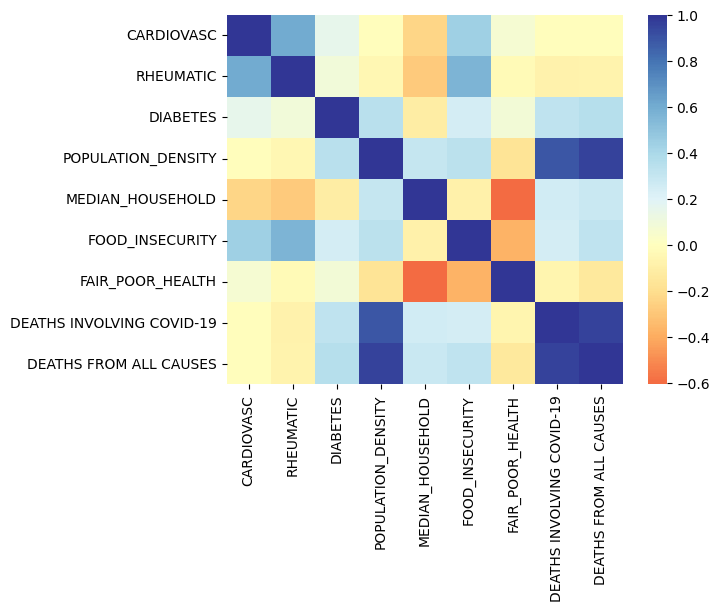

In [164]:
#Visualizing the correlation between variables
sns.heatmap(covid_epidemiological_data.iloc[:,-10:].corr('spearman'), center=0, cmap='RdYlBu')

### **Aggregated data**

This aggregated dataset provides a concise overview of clinical data, allowing for comparisons and analyses based on urban and rural code classifications. This data also provides a summarized view of COVID-19 impact and overall mortality in different urban and rural areas.

In [165]:
#aggregating final covid data using urban rural code column
clinicaldata_agg = covid_epidemiological_data.groupby('URBAN RURAL CODE').agg({
    'TOTAL_POPULATION': 'mean',
    'MEAN_AGE': 'mean',
    'DEATHS FROM ALL CAUSES': 'sum'
})
clinicaldata_agg

,TOTAL_POPULATION,MEAN_AGE,DEATHS FROM ALL CAUSES
URBAN RURAL CODE,,,
Large central metro,2.131391e+06,36.218420,383934.0
Large fringe metro,1.698733e+05,38.693471,143437.0
Medium metro,1.783311e+05,38.514620,159578.0
Micropolitan,3.611176e+04,38.496345,56492.0
Noncore,1.160889e+04,41.575190,48295.0
Small metro,8.320400e+04,39.075261,83535.0


#### **Graph-3: Deaths in Urban Rural area**

In [166]:
#Aggregating the dataframe by using URBAN RURAL CODE column to get the average of	DEATHS INVOLVING COVID-19
agg_clinical_data = covid_epidemiological_data.groupby(['URBAN RURAL CODE']).agg({'DEATHS INVOLVING COVID-19': 'mean'})
agg_clinical_data

,DEATHS INVOLVING COVID-19
URBAN RURAL CODE,
Large central metro,7357.666667
Large fringe metro,469.310345
Medium metro,951.480000
Micropolitan,142.622222
Noncore,26.214876
Small metro,589.952381


The presented data displays the average number of deaths involving COVID-19 across various categories in the 'URBAN RURAL CODE' column. Each average value represents the mean number of deaths involving COVID-19 within the specified urban or rural classification. These figures provide a comparative understanding of the impact of the pandemic across different community types. For instance, larger metropolitan areas might have higher average death counts, while rural or micropolitan areas may show lower averages. This information is valuable for assessing and addressing the varied impact of COVID-19 in diverse geographic settings.

<Figure size 1000x600 with 0 Axes>

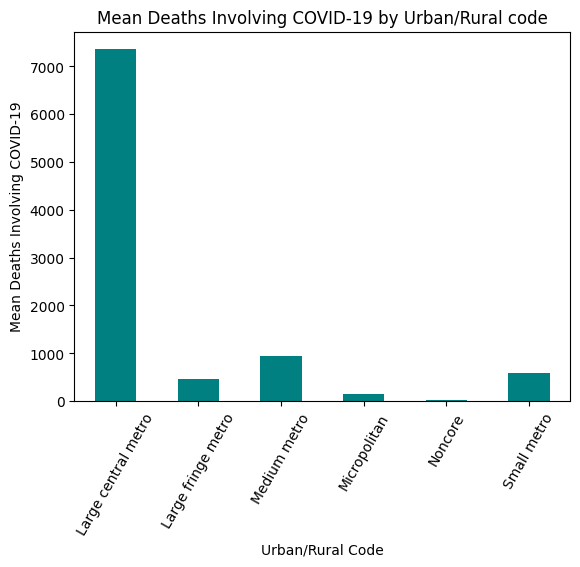

In [167]:
#plotting bar graph of mean of covid deaths using urban rural code column
def plot_covid_deaths(dataframe):
    plt.figure(figsize=(10, 6))
    dataframe.plot(kind='bar', legend=False, color='teal')
    plt.xlabel('Urban/Rural Code')
    plt.ylabel('Mean Deaths Involving COVID-19')
    plt.title('Mean Deaths Involving COVID-19 by Urban/Rural code')
    plt.xticks(rotation=60)
    plt.show()
plot_covid_deaths(agg_clinical_data)

The bar graph illustrates the mean deaths involving COVID-19 for various urban and rural classifications. Each bar represents a specific category, such as "Large central metro," "Large fringe metro," "Medium metro," "Micropolitan," "Noncore," and "Small metro." The graph provides a clear visual comparison, allowing for insights into the relative impact of the pandemic across diverse geographic settings. It serves as a valuable tool for understanding the distribution of COVID-19-related mortality in different population areas.

#### **Graph-4: Correlation Assessment for total population with covid-19 deaths**

The regression plot shows the relationship between the total population and deaths involving COVID-19. The plot shows a positive correlation between total population and deaths involving COVID-19. This means that as the total population of a city increases, the number of deaths involving COVID-19 also tends to increase. Additionally, larger cities may have more people with underlying health conditions, which can make them more vulnerable to serious illness and death from COVID-19.

<Axes: xlabel='TOTAL_POPULATION', ylabel='DEATHS INVOLVING COVID-19'>

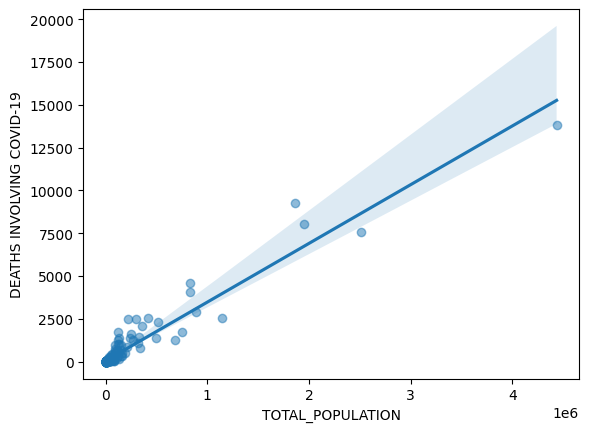

In [168]:
#Plotting a regression plot to show the relation between Total population and covid-19 deaths
sns.regplot(x= "TOTAL_POPULATION", y= "DEATHS INVOLVING COVID-19", data= covid_epidemiological_data, scatter_kws={'alpha':0.5})

#### **Graph-5: Distribution of XSMOKERS**

The boxplot shows that XSMOKERS are more common in urban areas than in rural areas. The median XSMOKERS score in urban areas is 16, while the median XSMOKERS score in rural areas is 12. This means that half of all urban XSMOKERS have scores of 16 or higher, while half of all rural XSMOKERS have scores of 12 or higher.

<Axes: xlabel='URBAN RURAL CODE', ylabel='XSMOKERS'>

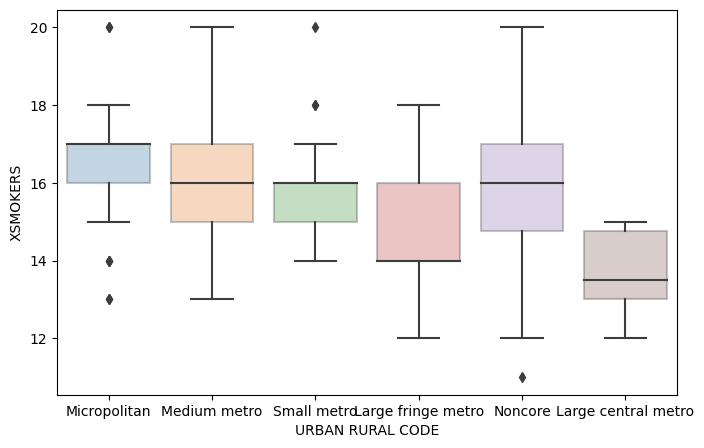

In [169]:
#plotting boxplots to show the distribution of xsmokers in urban rural code
from matplotlib import pyplot
fig, (ax1) = pyplot.subplots(1, figsize=(8,5))
sns.boxplot(ax = ax1, x = 'URBAN RURAL CODE', y = 'XSMOKERS', data = covid_epidemiological_data, boxprops=dict(alpha=.3))

#### **Graph-6: Identifying High risk group**


The pie chart shows the percentage of patients with various risk factors for COVID-19. The most common risk factors are cardiovascular disease (43.3%) and diabetes (28.1%). Other risk factors include hypertension, ischemia, HIV, leukemia, LRI, cerebrovascular disease, COPD, asthma, rheumatoid arthritis, and atrial fibrillation. The information on the pie chart can be used by healthcare professionals to identify patients at high risk for COVID-19 and to develop strategies to reduce their risk.

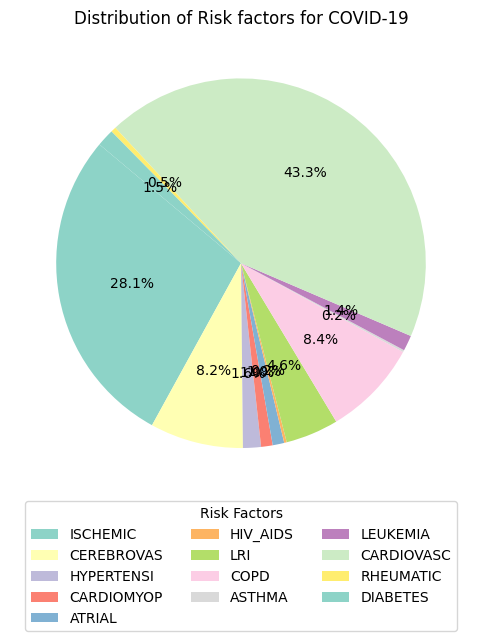

In [170]:
#Plotting a piechart for various risk factors of covid-19
risk_factors = ['ISCHEMIC', 'CEREBROVAS', 'HYPERTENSI', 'CARDIOMYOP', 'ATRIAL','HIV_AIDS',
                    'LRI', 'COPD', 'ASTHMA', 'LEUKEMIA', 'CARDIOVASC', 'RHEUMATIC',
                    'DIABETES']
colors = sns.color_palette('Set3', len(risk_factors))

column_sums = covid_epidemiological_data[risk_factors].sum()
plt.figure(figsize=(8, 6))
plt.pie(column_sums, autopct='%1.1f%%', startangle=140, colors=colors, labels=None)
plt.legend(title='Risk Factors', labels=risk_factors, loc='upper center', bbox_to_anchor=(0.5, -0.0), ncol=3)
plt.title('Distribution of Risk factors for COVID-19')
plt.show()

# **Conclusion**

In my study, I have examined various datasets like demographics of Covid-19, risk factors for COVID-19 along with Commorbidities and social factors and covid-19 deaths in teaxs.

### **Key insights:**

▪ Identification of the top 10 states most affected by COVID-19 based on total population.

▪ The analysis then focuses on Texas, visualizing the urban-rural distribution of COVID-19 deaths and exploring correlations between various factors.

▪ The final aggregation examines the mean deaths involving COVID-19 based on urban-rural codes, revealing distinctions in the impact of the virus across different settings.

▪ A regression plot demonstrates a positive correlation between total population and COVID-19 deaths, while boxplots illustrate the distribution of x-smokers across urban-rural codes.

▪The analysis concludes with a pie chart showcasing the distribution of various risk factors for COVID-19.

In conclusion, the exploration and analysis of diverse COVID-19 datasets related to Texas has provided a comprehensive understanding of the pandemic's complex effects. Examining the 'Impact of COVID-19 across various demographics and factors, including comorbidities and death rates,' emphasizes the complex challenges faced by different demographic groups in the state. By identifying the risk factors associated with COVID-19, the project contributes valuable insights for prioritizing vaccination distribution strategies and crafting targeted public health interventions. The examination of deaths within the total population and differentiation between urban and rural areas further illuminates the geographic and societal disparities in the toll of the virus. As Texas emerges as a state profoundly affected by the pandemic, these findings are instrumental in informing healthcare infrastructure responses, resource allocations, and policies customized to protect those most vulnerable. The project emphasizes the importance of recognizing patterns among older adults and individuals with pre-existing health conditions, emphasizing the need for ongoing vigilance, resilience, and a concerted global effort to mitigate the impacts of COVID-19. Additionally, the correlation analysis revealed significant associations, including strong correlations between COVID deaths and overall deaths, population density and mortality rates, and food insecurity with specific comorbidities, contributing to a complex understanding of the interconnected factors influencing the course of COVID-19 in Texas.